<a href="https://colab.research.google.com/github/ShivaniR-portfolio/Codsoft/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

Importing Datasets

In [33]:
data=pd.read_csv("/content/Titanic-Dataset.csv")
data
train = pd.read_csv("/content/Titanic-Dataset.csv")
test = pd.read_csv("/content/Titanic-Dataset.csv")


Data Cleaning

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [35]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [36]:

data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data['Cabin'] = data['Cabin'].fillna('Unknown')

data['Deck'] = data['Cabin'].apply(lambda x: x[0] if x != 'Unknown' else 'U')


print("Missing values:\n", data.isnull().sum())


print("\nCleaned sample:\n", data[['Name', 'Age', 'Embarked', 'Cabin', 'Deck']].head())

Missing values:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Deck           0
dtype: int64

Cleaned sample:
                                                 Name   Age Embarked    Cabin  \
0                            Braund, Mr. Owen Harris  22.0        S  Unknown   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0        C      C85   
2                             Heikkinen, Miss. Laina  26.0        S  Unknown   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0        S     C123   
4                           Allen, Mr. William Henry  35.0        S  Unknown   

  Deck  
0    U  
1    C  
2    U  
3    C  
4    U  


Data Visualization

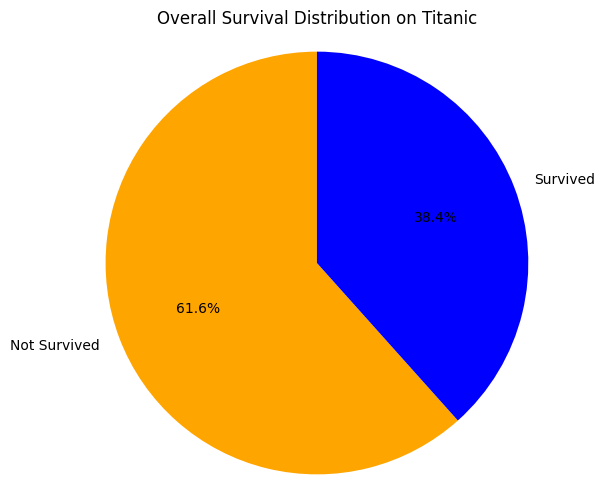

In [37]:


# Count survived and not survived
survival_counts = data['Survived'].value_counts()

labels = ['Not Survived', 'Survived']
colors = ['orange', 'blue']  # Orange = 0, Blue = 1

# Create pie chart
plt.figure(figsize=(6,6))
plt.pie(survival_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Overall Survival Distribution on Titanic')
plt.axis('equal')  # Keeps the pie chart circular
plt.show()


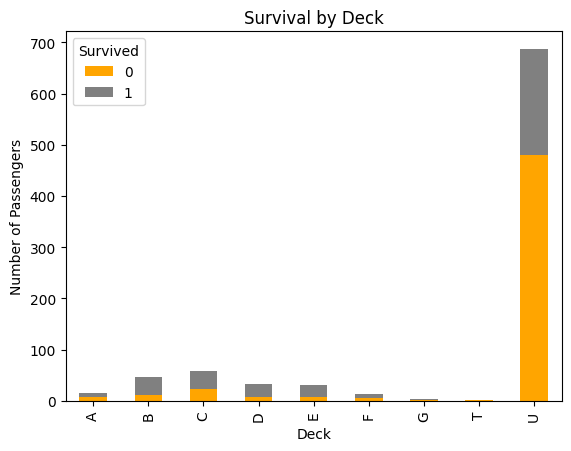

In [38]:
data['Cabin'] = data['Cabin'].fillna('Unknown')
data['Deck'] = data['Cabin'].apply(lambda x: x[0] if x != 'Unknown' else 'U')

deck_survival = data.groupby(['Deck', 'Survived']).size().unstack()
deck_survival.plot(kind='bar', stacked=True, color=['orange', 'grey'])
plt.title('Survival by Deck')
plt.xlabel('Deck')
plt.ylabel('Number of Passengers')
plt.show()


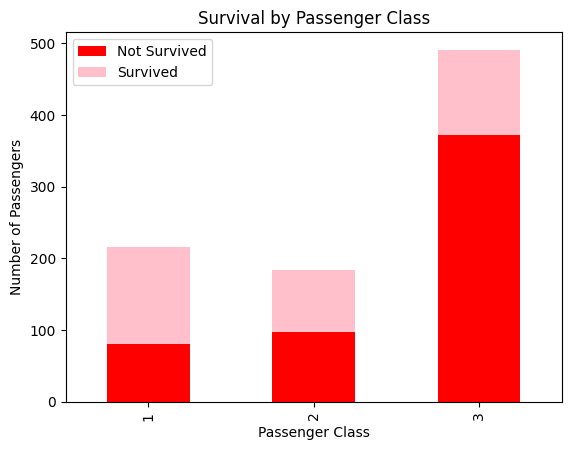

In [39]:
survived_by_class = data.groupby(['Pclass', 'Survived']).size().unstack()

survived_by_class.plot(kind='bar', stacked=True, color=['red', 'pink'])
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.legend(['Not Survived', 'Survived'])
plt.show()




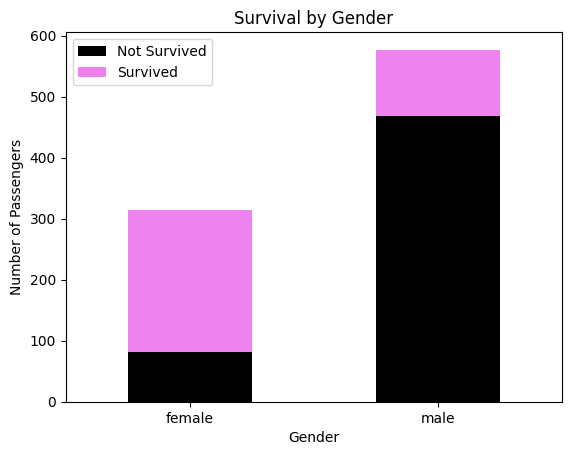

In [40]:
survived_by_gender = data.groupby(['Sex', 'Survived']).size().unstack()

survived_by_gender.plot(kind='bar', stacked=True, color=['black', 'violet'])
plt.title('Survival by Gender')
plt.ylabel('Number of Passengers')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.legend(['Not Survived', 'Survived'])
plt.show()

Converting remaining text columns into numbers

In [41]:
# Convert Sex
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

# Convert Embarked
embarked_map = {'S': 0, 'C': 1, 'Q': 2}
train['Embarked'] = train['Embarked'].map(embarked_map)
test['Embarked'] = test['Embarked'].map(embarked_map)


Train test split

In [42]:
if 'Name' in data.columns:
    data = data.drop(['Name'], axis=1)
# Drop unwanted columns if they exist
cols_to_drop = ['Name', 'Ticket', 'Cabin', 'PassengerId']
data = data.drop([col for col in cols_to_drop if col in data.columns], axis=1)

# Fill missing values
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].fillna(data[col].mode()[0])
    else:
        data[col] = data[col].fillna(data[col].median())

# Convert all categorical columns to numeric
data = pd.get_dummies(data, drop_first=True)

# Separate features and target
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)



Train logistic regression model

In [43]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

Evaluation

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on validation data
y_pred = model.predict(X_val)

# Evaluate
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))


Accuracy: 0.8100558659217877
Confusion Matrix:
 [[90 15]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

